In [12]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## 1. Load Cluster Data

Loading the three stocks that belong to Cluster 1 from our pattern-based clustering.

In [13]:
# Define dataset directory and cluster stocks
dataset_dir = Path(r"c:\Users\ananyas\OneDrive - Synopsys, Inc\Documents\iisc\subject\semester 1\data science in practice\project\dataset")

# Cluster 1 stocks (from pattern-based clustering)
cluster_stocks = ['ICICIPRULI', 'ICICIGI', 'HDFCAMC']

# Read all stock data
stock_data = {}
for stock in cluster_stocks:
    file_path = dataset_dir / f"{stock}_minute.csv"
    if file_path.exists():
        df = pd.read_csv(file_path)
        # Standardize column names
        df.columns = df.columns.str.lower()
        stock_data[stock] = df
        print(f"✓ Loaded {stock}: {df.shape[0]:,} records")
    else:
        print(f"⚠️ Warning: {stock}_minute.csv not found")

print(f"\n✓ Total stocks loaded: {len(stock_data)}")

✓ Loaded ICICIPRULI: 816,504 records
✓ Loaded ICICIGI: 724,352 records
✓ Loaded HDFCAMC: 644,432 records

✓ Total stocks loaded: 3


## 2. Price Correlation Analysis

High correlation indicates stocks move together, making them suitable for joint modeling.

PRICE CORRELATION ANALYSIS

Correlation Matrix:
            ICICIPRULI   ICICIGI   HDFCAMC
ICICIPRULI    1.000000  0.859768  0.750981
ICICIGI       0.859768  1.000000  0.928777
HDFCAMC       0.750981  0.928777  1.000000

✓ Average Correlation: 0.8465
  → EXCELLENT: Very similar price movement patterns


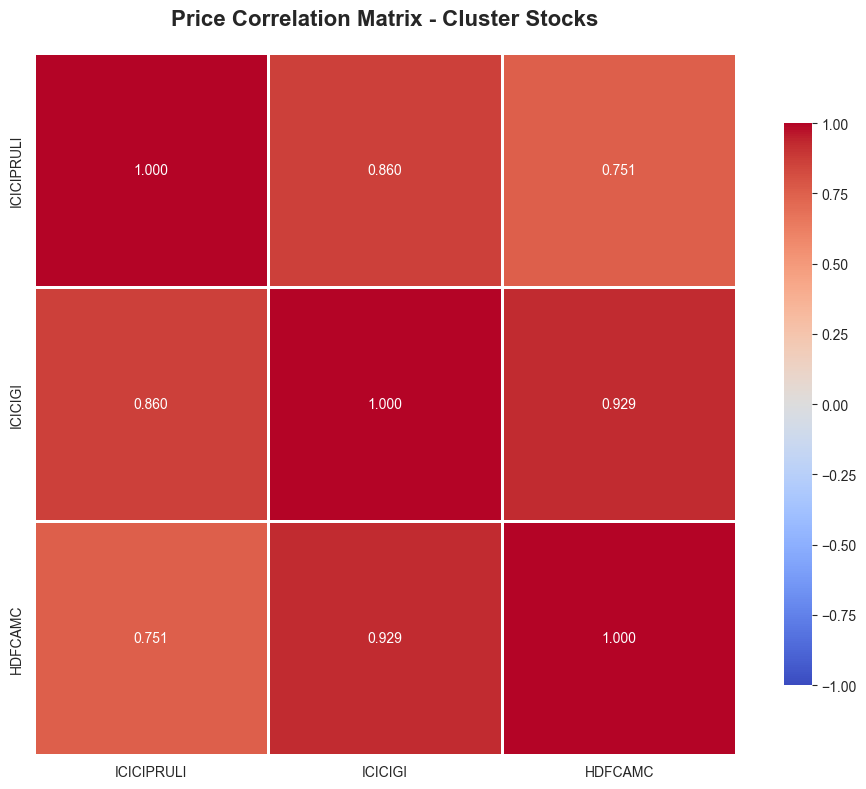


💡 Interpretation:
   • Values close to 1.0 = Strong positive correlation (move together)
   • Values close to 0.0 = No correlation (independent movement)
   • Values close to -1.0 = Negative correlation (move opposite)


In [14]:
# Create a combined dataframe with close prices
close_prices = pd.DataFrame()

for stock, df in stock_data.items():
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
    elif 'datetime' in df.columns:
        df['date'] = pd.to_datetime(df['datetime'])
    
    df = df.sort_values('date')
    close_prices[stock] = df.set_index('date')['close']

# Calculate correlation matrix
correlation_matrix = close_prices.corr()

print("="*80)
print("PRICE CORRELATION ANALYSIS")
print("="*80)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Calculate average correlation
upper_triangle = correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)]
avg_correlation = upper_triangle.mean()

print(f"\n✓ Average Correlation: {avg_correlation:.4f}")

if avg_correlation > 0.7:
    print("  → EXCELLENT: Very similar price movement patterns")
elif avg_correlation > 0.5:
    print("  → GOOD: Similar behavior")
elif avg_correlation > 0.3:
    print("  → MODERATE: Somewhat related")
else:
    print("  → POOR: Independent behavior")

# Visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8}, fmt='.3f',
            vmin=-1, vmax=1)
plt.title('Price Correlation Matrix - Cluster Stocks', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("   • Values close to 1.0 = Strong positive correlation (move together)")
print("   • Values close to 0.0 = No correlation (independent movement)")
print("   • Values close to -1.0 = Negative correlation (move opposite)")

## 3. Statistical Properties Comparison

Analyzing price distributions, ranges, and statistical measures.

STATISTICAL PROPERTIES COMPARISON

Price Statistics Summary:
             Mean Price  Median Price     Std Dev  Min Price  Max Price  Price Range  Coefficient of Variation
ICICIPRULI   483.677515        473.05  111.024707     231.95      792.9       560.95                  0.229543
ICICIGI     1309.223004       1298.85  352.464758     641.20     2284.6      1643.40                  0.269217
HDFCAMC     2700.047852       2520.00  917.192640    1227.00     5649.0      4422.00                  0.339695

✓ Coefficient of Variation (CV):
  Mean CV: 0.2795
  Std of CV: 0.0558
  Consistency Score: 0.1996
  → EXCELLENT: Very similar volatility patterns


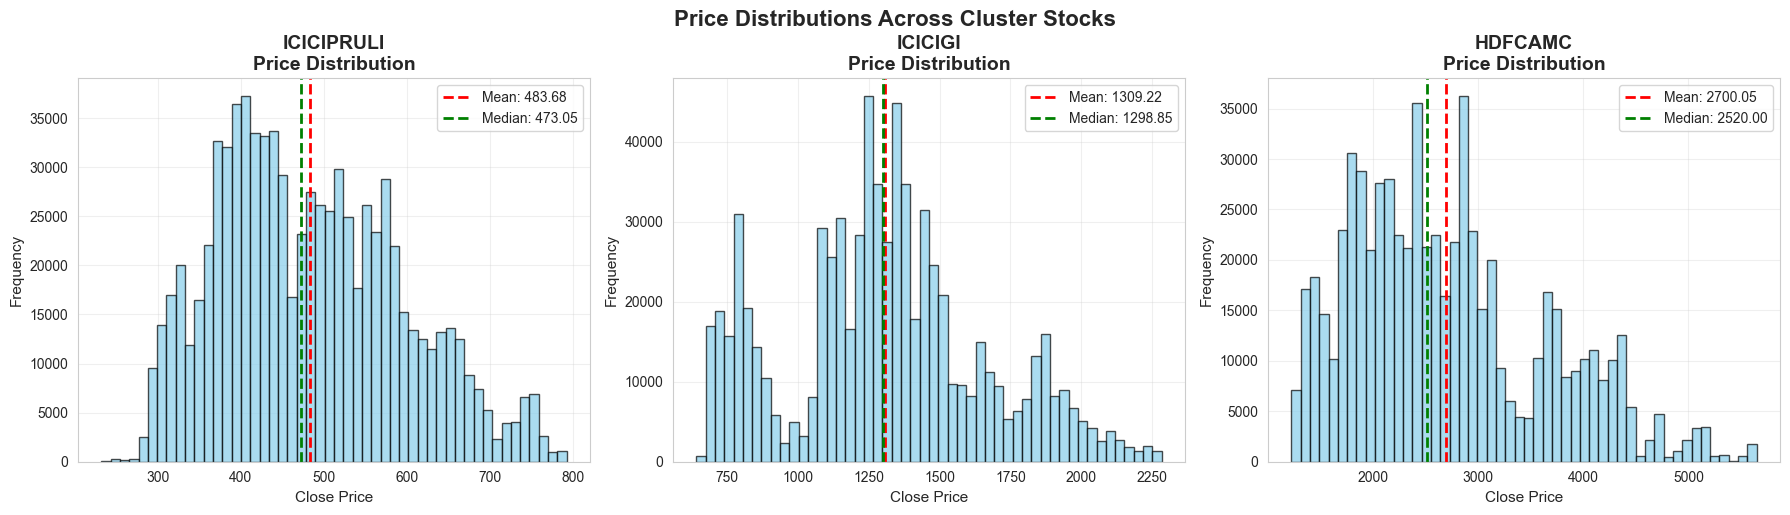

In [15]:
print("="*80)
print("STATISTICAL PROPERTIES COMPARISON")
print("="*80)

stats_summary = {}

for stock, df in stock_data.items():
    stats_summary[stock] = {
        'Mean Price': df['close'].mean(),
        'Median Price': df['close'].median(),
        'Std Dev': df['close'].std(),
        'Min Price': df['close'].min(),
        'Max Price': df['close'].max(),
        'Price Range': df['close'].max() - df['close'].min(),
        'Coefficient of Variation': df['close'].std() / df['close'].mean()
    }

stats_df = pd.DataFrame(stats_summary).T

print("\nPrice Statistics Summary:")
print(stats_df.to_string())

# Coefficient of Variation consistency
cv_std = stats_df['Coefficient of Variation'].std()
cv_mean = stats_df['Coefficient of Variation'].mean()

print(f"\n✓ Coefficient of Variation (CV):")
print(f"  Mean CV: {cv_mean:.4f}")
print(f"  Std of CV: {cv_std:.4f}")
print(f"  Consistency Score: {cv_std/cv_mean:.4f}")

if cv_std/cv_mean < 0.3:
    print("  → EXCELLENT: Very similar volatility patterns")
elif cv_std/cv_mean < 0.5:
    print("  → GOOD: Reasonably similar volatility")
else:
    print("  → MODERATE: Different volatility levels")

# Price Distribution Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (stock, df) in enumerate(stock_data.items()):
    ax = axes[idx]
    
    # Plot histogram
    ax.hist(df['close'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    ax.axvline(df['close'].mean(), color='red', linestyle='--', linewidth=2, 
               label=f'Mean: {df["close"].mean():.2f}')
    ax.axvline(df['close'].median(), color='green', linestyle='--', linewidth=2, 
               label=f'Median: {df["close"].median():.2f}')
    
    ax.set_title(f'{stock}\nPrice Distribution', fontsize=14, fontweight='bold')
    ax.set_xlabel('Close Price', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Price Distributions Across Cluster Stocks', fontsize=16, fontweight='bold', y=1.02)
plt.show()

## 4. Volatility Analysis

Comparing volatility patterns to assess risk profile similarity.

VOLATILITY ANALYSIS

Volatility Metrics:
            Daily Returns Std  Daily Returns Mean  Returns Skewness  Returns Kurtosis  Max Daily Return  Min Daily Return  Positive Days %
ICICIPRULI           0.001185            0.000001         -1.807960        377.481357          0.098517         -0.101813        43.968554
ICICIGI              0.001251            0.000002         -2.059219        409.753899          0.099110         -0.114042        44.211378
HDFCAMC              0.001161            0.000003         -3.056838        775.400541          0.088946         -0.145496        45.222149

✓ Volatility Consistency:
  Mean Volatility: 0.001199
  Std of Volatility: 0.000046
  Consistency Score: 0.0386
  → EXCELLENT: Similar risk profiles


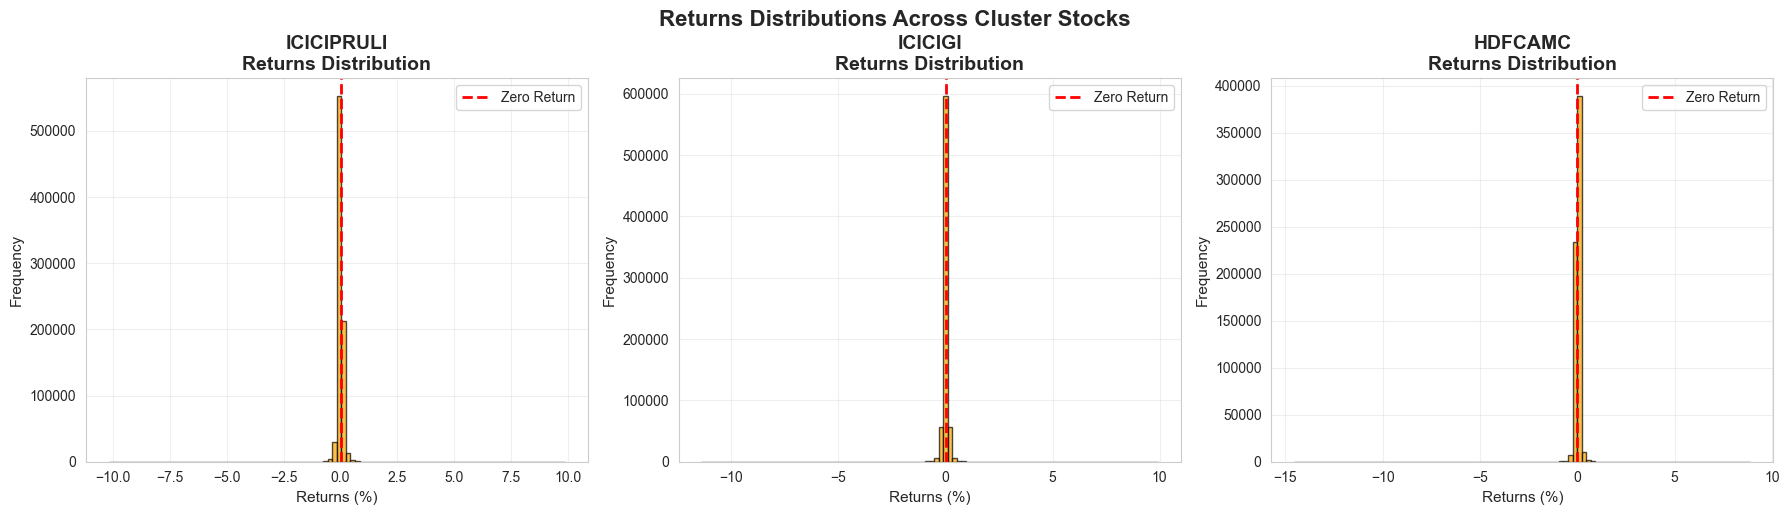

In [16]:
print("="*80)
print("VOLATILITY ANALYSIS")
print("="*80)

volatility_summary = {}

for stock, df in stock_data.items():
    df = df.copy()
    
    # Calculate returns
    df['returns'] = df['close'].pct_change()
    
    # Calculate various volatility measures
    volatility_summary[stock] = {
        'Daily Returns Std': df['returns'].std(),
        'Daily Returns Mean': df['returns'].mean(),
        'Returns Skewness': df['returns'].skew(),
        'Returns Kurtosis': df['returns'].kurtosis(),
        'Max Daily Return': df['returns'].max(),
        'Min Daily Return': df['returns'].min(),
        'Positive Days %': (df['returns'] > 0).mean() * 100
    }

vol_df = pd.DataFrame(volatility_summary).T

print("\nVolatility Metrics:")
print(vol_df.to_string())

# Volatility consistency
vol_std = vol_df['Daily Returns Std'].std()
vol_mean = vol_df['Daily Returns Std'].mean()
vol_consistency = vol_std / vol_mean

print(f"\n✓ Volatility Consistency:")
print(f"  Mean Volatility: {vol_mean:.6f}")
print(f"  Std of Volatility: {vol_std:.6f}")
print(f"  Consistency Score: {vol_consistency:.4f}")

if vol_consistency < 0.3:
    print("  → EXCELLENT: Similar risk profiles")
elif vol_consistency < 0.5:
    print("  → GOOD: Reasonably similar risk")
else:
    print("  → MODERATE: Different risk levels")

# Visualize returns distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (stock, df) in enumerate(stock_data.items()):
    ax = axes[idx]
    df = df.copy()
    df['returns'] = df['close'].pct_change()
    
    # Plot returns histogram
    returns = df['returns'].dropna() * 100  # Convert to percentage
    ax.hist(returns, bins=100, alpha=0.7, color='orange', edgecolor='black')
    ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Return')
    
    ax.set_title(f'{stock}\nReturns Distribution', fontsize=14, fontweight='bold')
    ax.set_xlabel('Returns (%)', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Returns Distributions Across Cluster Stocks', fontsize=16, fontweight='bold', y=1.02)
plt.show()

## 5. Price Movement Patterns

Visualizing how stocks move over time.

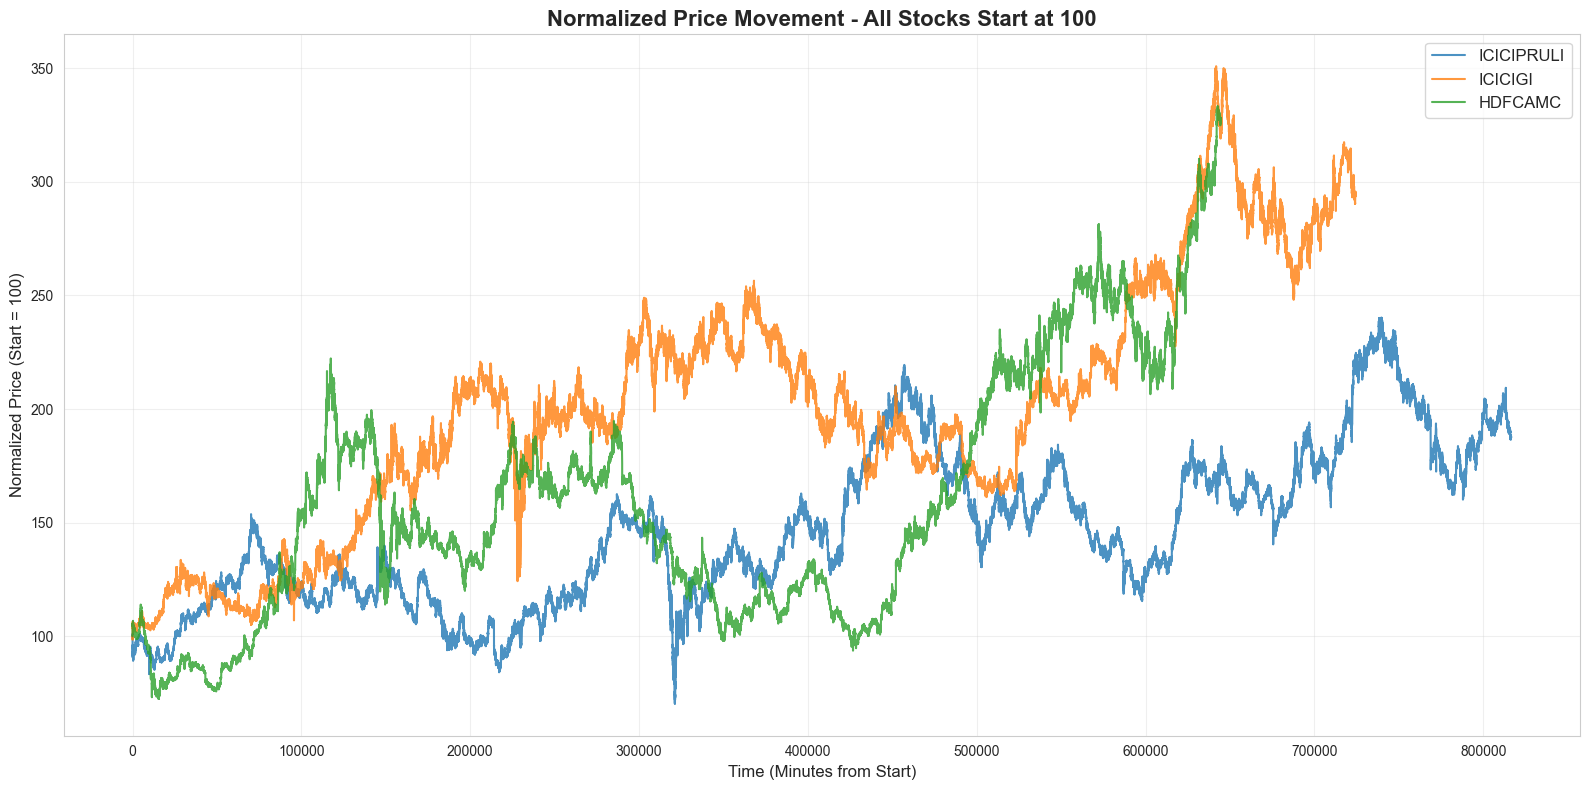


💡 Interpretation:
   • Stocks moving together = Good cluster (parallel lines)
   • Stocks diverging = Poor cluster (lines spreading apart)
   • Similar end points = Similar overall performance


In [17]:
# Normalize prices to compare trends
plt.figure(figsize=(16, 8))

for stock, df in stock_data.items():
    df = df.copy()
    if 'date' not in df.columns:
        df['date'] = pd.to_datetime(df['datetime'])
    else:
        df['date'] = pd.to_datetime(df['date'])
    
    df = df.sort_values('date')
    # Normalize to start at 100
    normalized = (df['close'] / df['close'].iloc[0]) * 100
    
    # Plot each stock separately with its own length
    plt.plot(normalized.values, label=stock, linewidth=1.5, alpha=0.8)

plt.xlabel('Time (Minutes from Start)', fontsize=12)
plt.ylabel('Normalized Price (Start = 100)', fontsize=12)
plt.title('Normalized Price Movement - All Stocks Start at 100', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("   • Stocks moving together = Good cluster (parallel lines)")
print("   • Stocks diverging = Poor cluster (lines spreading apart)")
print("   • Similar end points = Similar overall performance")

## 6. Time Series Patterns (Recent Data)

Examining recent price action to see current correlation.

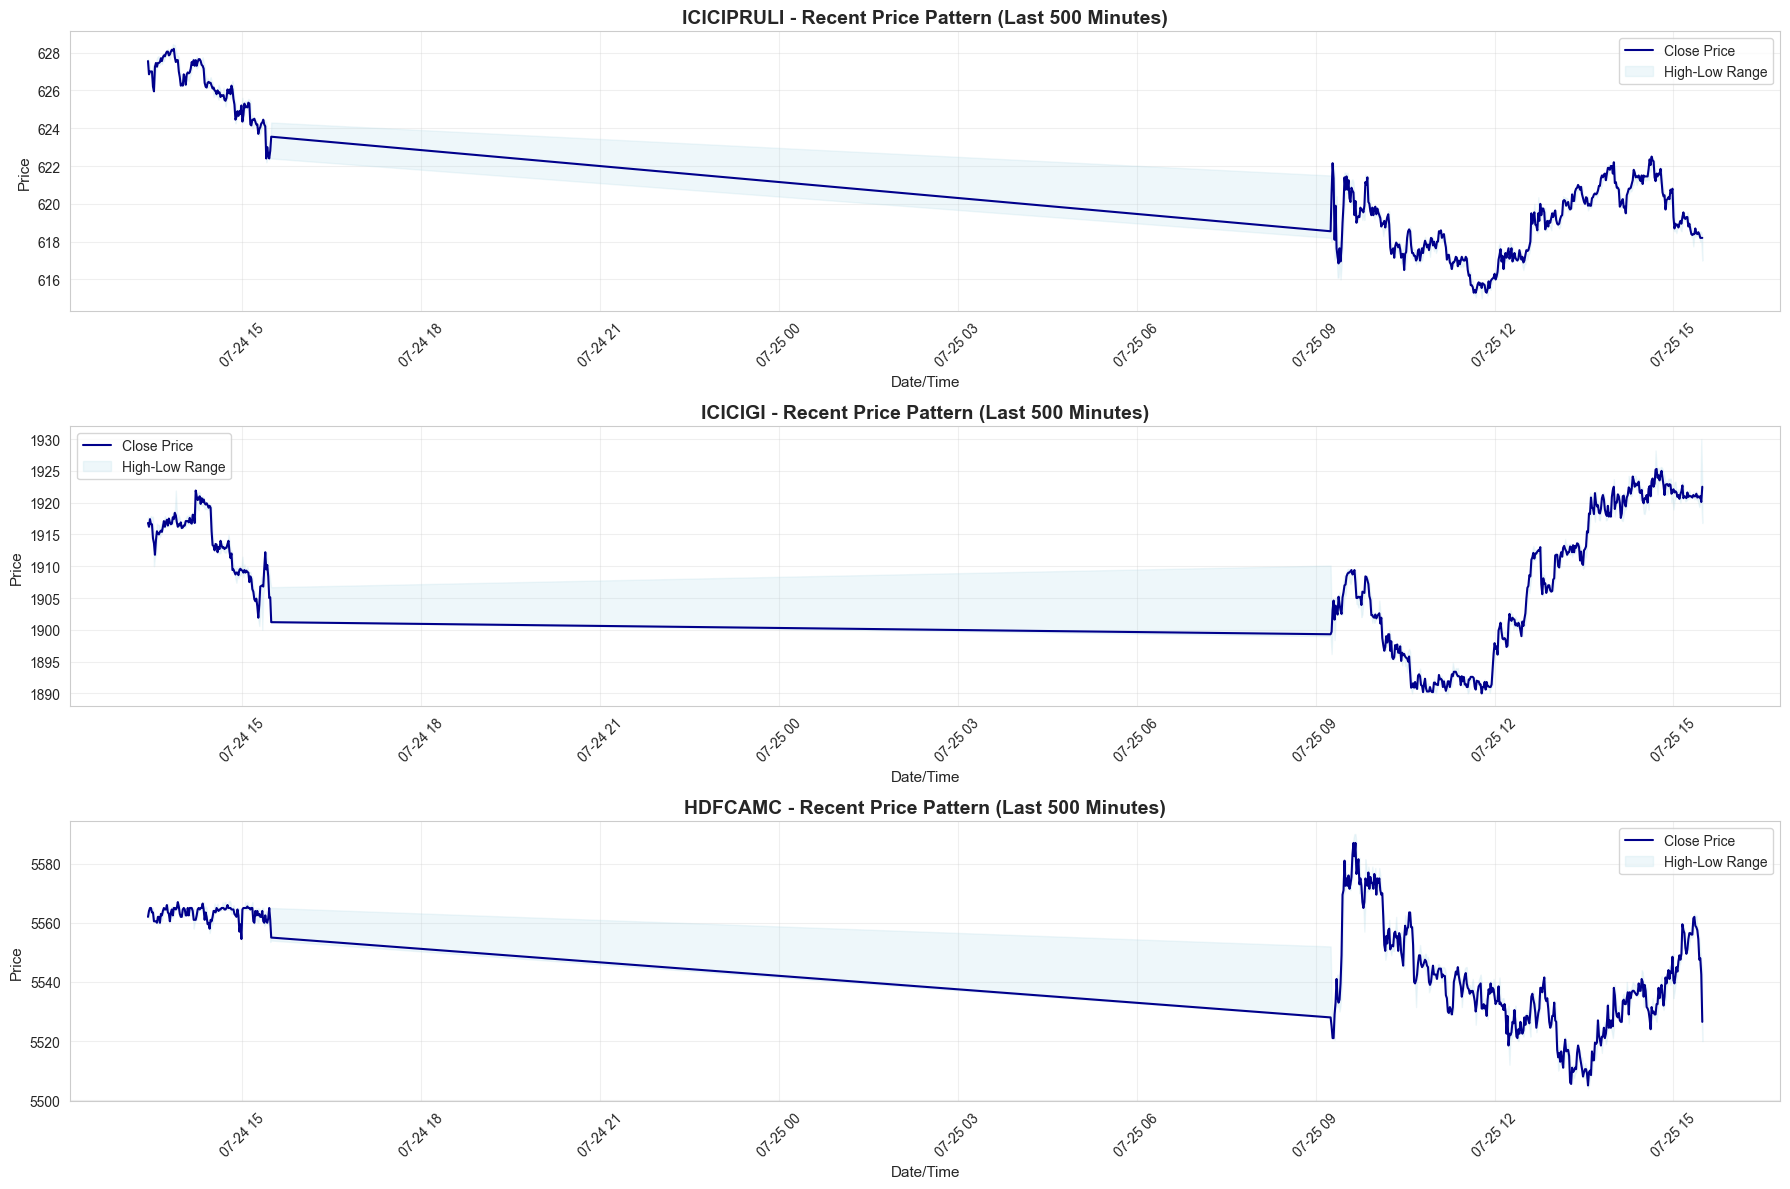

In [18]:
# Plot recent price patterns (last 500 minutes)
fig, axes = plt.subplots(3, 1, figsize=(18, 12))

for idx, (stock, df) in enumerate(stock_data.items()):
    df = df.copy()
    if 'date' not in df.columns:
        df['date'] = pd.to_datetime(df['datetime'])
    else:
        df['date'] = pd.to_datetime(df['date'])
    
    df = df.sort_values('date').tail(500)  # Last 500 data points
    
    ax = axes[idx]
    ax.plot(df['date'], df['close'], label='Close Price', linewidth=1.5, color='darkblue')
    ax.fill_between(df['date'], df['low'], df['high'], alpha=0.2, color='lightblue', 
                     label='High-Low Range')
    
    ax.set_title(f'{stock} - Recent Price Pattern (Last 500 Minutes)', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Date/Time', fontsize=11)
    ax.set_ylabel('Price', fontsize=11)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
#plt.suptitle('Recent Price Patterns Across Cluster Stocks', fontsize=16, fontweight='bold', y=0.995)
plt.show()

## 7. Trend Alignment Analysis

Checking if stocks have similar directional trends.

In [19]:
print("="*80)
print("TREND ALIGNMENT ANALYSIS")
print("="*80)

trend_summary = {}

for stock, df in stock_data.items():
    df = df.copy()
    
    # Calculate overall trend
    first_price = df['close'].iloc[0]
    last_price = df['close'].iloc[-1]
    price_change_pct = ((last_price - first_price) / first_price) * 100
    
    # Calculate moving averages
    df['sma_20'] = df['close'].rolling(window=20, min_periods=1).mean()
    df['sma_50'] = df['close'].rolling(window=50, min_periods=1).mean()
    
    # Trend direction
    trend_direction = 'Upward' if price_change_pct > 0 else 'Downward'
    
    # Time in uptrend vs downtrend
    uptrend_pct = (df['sma_20'] > df['sma_50']).mean() * 100
    
    trend_summary[stock] = {
        'Overall Change %': price_change_pct,
        'Trend Direction': trend_direction,
        'Time in Uptrend %': uptrend_pct,
        'Final Price': last_price,
        'Starting Price': first_price
    }

trend_df = pd.DataFrame(trend_summary).T

print("\nTrend Summary:")
print(trend_df.to_string())

# Check trend alignment
all_up = all(trend_df['Overall Change %'] > 0)
all_down = all(trend_df['Overall Change %'] < 0)

print(f"\n✓ Trend Alignment:")
if all_up:
    print("  → EXCELLENT: All stocks trending upward")
elif all_down:
    print("  → EXCELLENT: All stocks trending downward")
else:
    print("  → MIXED: Stocks have different trend directions")

# Average time in uptrend
avg_uptrend = trend_df['Time in Uptrend %'].mean()
print(f"\n✓ Average Time in Uptrend: {avg_uptrend:.1f}%")

# Trend alignment score
trend_std = trend_df['Time in Uptrend %'].std()
if trend_std < 10:
    print(f"  → EXCELLENT: Very aligned trends (std: {trend_std:.2f})")
elif trend_std < 20:
    print(f"  → GOOD: Similar trends (std: {trend_std:.2f})")
else:
    print(f"  → MODERATE: Different trends (std: {trend_std:.2f})")

TREND ALIGNMENT ANALYSIS

Trend Summary:
           Overall Change % Trend Direction Time in Uptrend % Final Price Starting Price
ICICIPRULI        87.333333          Upward         49.019111       618.2          330.0
ICICIGI          195.269544          Upward         49.556569      1922.5          651.1
HDFCAMC          226.143405          Upward         49.322659      5526.5         1694.5

✓ Trend Alignment:
  → EXCELLENT: All stocks trending upward

✓ Average Time in Uptrend: 49.3%
  → EXCELLENT: Very aligned trends (std: 0.27)


## 8. Price Scale Similarity

Analyzing if stocks have comparable price ranges for modeling.

PRICE SCALE SIMILARITY ANALYSIS

Price Scale Summary:
             Mean Price  Price Range  Relative Range %
ICICIPRULI   483.677515       560.95        115.976034
ICICIGI     1309.223004      1643.40        125.524834
HDFCAMC     2700.047852      4422.00        163.774875

✓ Price Scale Consistency:
  Mean of Mean Prices: 1497.65
  Std of Mean Prices: 1120.14
  Consistency Score: 0.7479
  → MODERATE: Different scales (normalization needed)


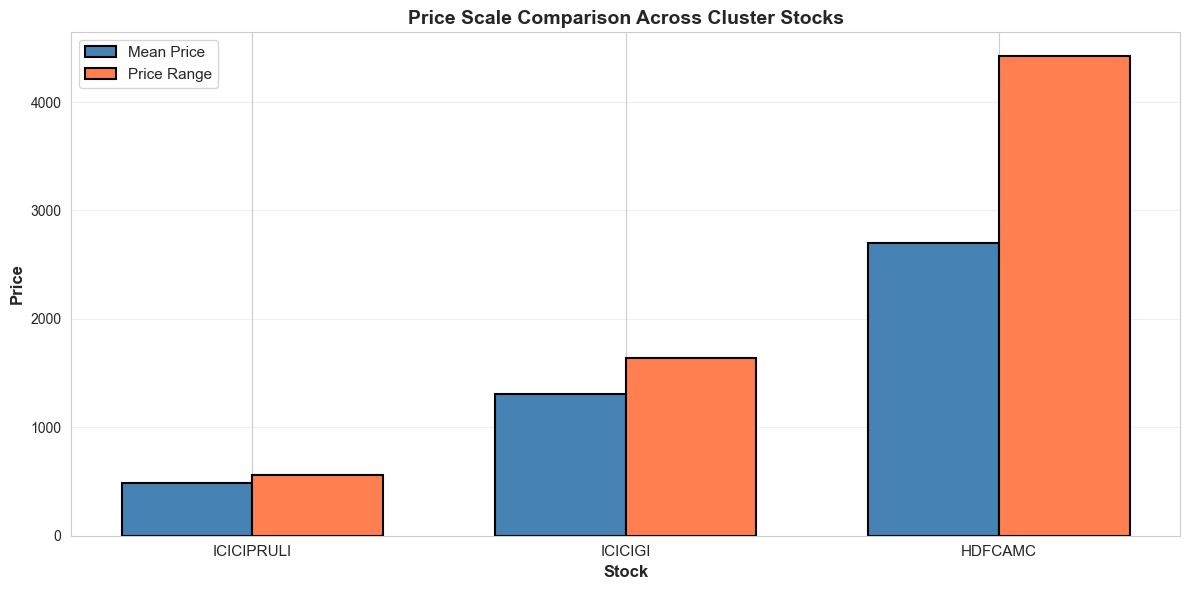

In [20]:
print("="*80)
print("PRICE SCALE SIMILARITY ANALYSIS")
print("="*80)

scale_summary = {}

for stock, df in stock_data.items():
    mean_price = df['close'].mean()
    scale_summary[stock] = {
        'Mean Price': mean_price,
        'Price Range': df['close'].max() - df['close'].min(),
        'Relative Range %': ((df['close'].max() - df['close'].min()) / mean_price) * 100
    }

scale_df = pd.DataFrame(scale_summary).T

print("\nPrice Scale Summary:")
print(scale_df.to_string())

# Scale consistency
price_mean = scale_df['Mean Price'].mean()
price_std = scale_df['Mean Price'].std()
scale_consistency = price_std / price_mean

print(f"\n✓ Price Scale Consistency:")
print(f"  Mean of Mean Prices: {price_mean:.2f}")
print(f"  Std of Mean Prices: {price_std:.2f}")
print(f"  Consistency Score: {scale_consistency:.4f}")

if scale_consistency < 0.3:
    print("  → EXCELLENT: Similar price ranges (minimal normalization needed)")
elif scale_consistency < 0.5:
    print("  → GOOD: Comparable scales (light normalization recommended)")
elif scale_consistency < 1.0:
    print("  → MODERATE: Different scales (normalization needed)")
else:
    print("  → POOR: Very different scales (normalization critical)")

# Visualize price scales
fig, ax = plt.subplots(figsize=(12, 6))

x_pos = np.arange(len(cluster_stocks))
means = scale_df['Mean Price'].values
ranges = scale_df['Price Range'].values

bar_width = 0.35
ax.bar(x_pos - bar_width/2, means, bar_width, label='Mean Price', 
       color='steelblue', edgecolor='black', linewidth=1.5)
ax.bar(x_pos + bar_width/2, ranges, bar_width, label='Price Range', 
       color='coral', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Stock', fontsize=12, fontweight='bold')
ax.set_ylabel('Price', fontsize=12, fontweight='bold')
ax.set_title('Price Scale Comparison Across Cluster Stocks', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(cluster_stocks, fontsize=11)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 9. Overall Cluster Suitability Assessment

Comprehensive evaluation of whether these stocks should be modeled together.

In [21]:
print("="*100)
print("CLUSTER MODELING SUITABILITY ASSESSMENT")
print("="*100)

# Calculate scores based on previous analyses
scores = {}

# 1. Correlation Score
if avg_correlation > 0.7:
    scores['Correlation'] = (3, 'EXCELLENT', avg_correlation)
elif avg_correlation > 0.5:
    scores['Correlation'] = (2, 'GOOD', avg_correlation)
elif avg_correlation > 0.3:
    scores['Correlation'] = (1, 'MODERATE', avg_correlation)
else:
    scores['Correlation'] = (0, 'POOR', avg_correlation)

# 2. Volatility Score
if vol_consistency < 0.3:
    scores['Volatility'] = (3, 'EXCELLENT', vol_consistency)
elif vol_consistency < 0.5:
    scores['Volatility'] = (2, 'GOOD', vol_consistency)
elif vol_consistency < 0.8:
    scores['Volatility'] = (1, 'MODERATE', vol_consistency)
else:
    scores['Volatility'] = (0, 'POOR', vol_consistency)

# 3. Price Scale Score
if scale_consistency < 0.3:
    scores['Price Scale'] = (3, 'EXCELLENT', scale_consistency)
elif scale_consistency < 0.5:
    scores['Price Scale'] = (2, 'GOOD', scale_consistency)
elif scale_consistency < 1.0:
    scores['Price Scale'] = (1, 'MODERATE', scale_consistency)
else:
    scores['Price Scale'] = (0, 'POOR', scale_consistency)

# 4. Trend Alignment Score
if trend_std < 10:
    scores['Trend Alignment'] = (3, 'EXCELLENT', trend_std)
elif trend_std < 20:
    scores['Trend Alignment'] = (2, 'GOOD', trend_std)
elif trend_std < 30:
    scores['Trend Alignment'] = (1, 'MODERATE', trend_std)
else:
    scores['Trend Alignment'] = (0, 'POOR', trend_std)

# Display scores
print("\n" + "="*100)
print("ASSESSMENT SCORES:")
print("="*100)
print(f"\n{'Metric':<25} {'Score':<8} {'Rating':<12} {'Value':<15}")
print("-"*100)

total_score = 0
max_score = len(scores) * 3

for metric, (score, rating, value) in scores.items():
    total_score += score
    print(f"{metric:<25} {score}/3{'':<4} {rating:<12} {value:.4f}")

print("="*100)
print(f"OVERALL SCORE: {total_score}/{max_score} ({total_score/max_score*100:.1f}%)")
print("="*100)

# Provide recommendation
if total_score >= 9:
    recommendation = "✅ EXCELLENT - These stocks are highly suitable for joint modeling"
    details = """
These stocks demonstrate:
• Strong correlation indicating similar behavior
• Consistent volatility patterns for unified risk management
• Comparable price scales allowing effective joint modeling
• Aligned trends suggesting common market drivers

RECOMMENDED APPROACHES:
• Pooled regression models
• Multi-output neural networks  
• Ensemble methods with shared features
• Transfer learning across stocks
"""
elif total_score >= 6:
    recommendation = "✅ GOOD - Suitable for joint modeling with preprocessing"
    details = """
These stocks show reasonable similarity with some differences:
• Apply normalization/standardization before modeling
• Consider stock-specific features alongside shared features
• Use validation to ensure model generalizes across stocks

RECOMMENDED APPROACHES:
• Normalized multi-stock models
• Feature engineering to capture individual characteristics
• Ensemble with stock-specific components
"""
elif total_score >= 3:
    recommendation = "⚠️ MODERATE - Can be modeled together but with caution"
    details = """
Significant differences exist between stocks:
• Careful feature engineering required
• Consider hierarchical/mixed-effects models
• May benefit from separate models or advanced techniques

RECOMMENDED APPROACHES:
• Stock-specific submodels with shared parameters
• Multi-task learning with individual output heads
• Careful validation and monitoring
"""
else:
    recommendation = "❌ POOR - Not recommended for joint modeling"
    details = """
Stocks behave too differently for effective joint modeling:
• Individual models strongly recommended
• Re-evaluate clustering approach
• Consider different grouping criteria

RECOMMENDED APPROACHES:
• Separate individual models per stock
• Re-cluster with different features
• Use market segment information
"""

print(f"\n{recommendation}")
print(details)

# Specific recommendations based on scores
print("\n" + "="*100)
print("DETAILED RECOMMENDATIONS:")
print("="*100)

if scores['Correlation'][0] < 2:
    print("\n⚠️ CORRELATION:")
    print("   • Stocks show weak correlation")
    print("   • Verify these stocks truly belong in the same cluster")
    print("   • Consider adding more related stocks or re-clustering")

if scores['Volatility'][0] < 2:
    print("\n⚠️ VOLATILITY:")
    print("   • Inconsistent volatility patterns detected")
    print("   • Use risk-adjusted returns in features")
    print("   • Consider separate models for different volatility regimes")

if scores['Price Scale'][0] < 2:
    print("\n⚠️ PRICE SCALE:")
    print("   • Different price scales detected")
    print("   • MUST normalize or standardize prices before modeling")
    print("   • Use percentage returns instead of absolute prices")

if scores['Trend Alignment'][0] < 2:
    print("\n⚠️ TREND ALIGNMENT:")
    print("   • Stocks showing different trend directions")
    print("   • Capture trend as a feature in models")
    print("   • Consider regime-switching models")

if total_score >= 9:
    print("\n✅ ALL METRICS STRONG:")
    print("   • Excellent cluster for joint modeling")
    print("   • Can leverage correlation for improved predictions")
    print("   • Multi-output models will benefit from shared learning")
    print("   • Good candidate for transfer learning experiments")

print("\n" + "="*100)

CLUSTER MODELING SUITABILITY ASSESSMENT

ASSESSMENT SCORES:

Metric                    Score    Rating       Value          
----------------------------------------------------------------------------------------------------
Correlation               3/3     EXCELLENT    0.8465
Volatility                3/3     EXCELLENT    0.0386
Price Scale               1/3     MODERATE     0.7479
Trend Alignment           3/3     EXCELLENT    0.2695
OVERALL SCORE: 10/12 (83.3%)

✅ EXCELLENT - These stocks are highly suitable for joint modeling

These stocks demonstrate:
• Strong correlation indicating similar behavior
• Consistent volatility patterns for unified risk management
• Comparable price scales allowing effective joint modeling
• Aligned trends suggesting common market drivers

RECOMMENDED APPROACHES:
• Pooled regression models
• Multi-output neural networks  
• Ensemble methods with shared features
• Transfer learning across stocks


DETAILED RECOMMENDATIONS:

⚠️ PRICE SCALE:
   • Differ

## 10. Visual Summary

A comprehensive visual summary of cluster quality.

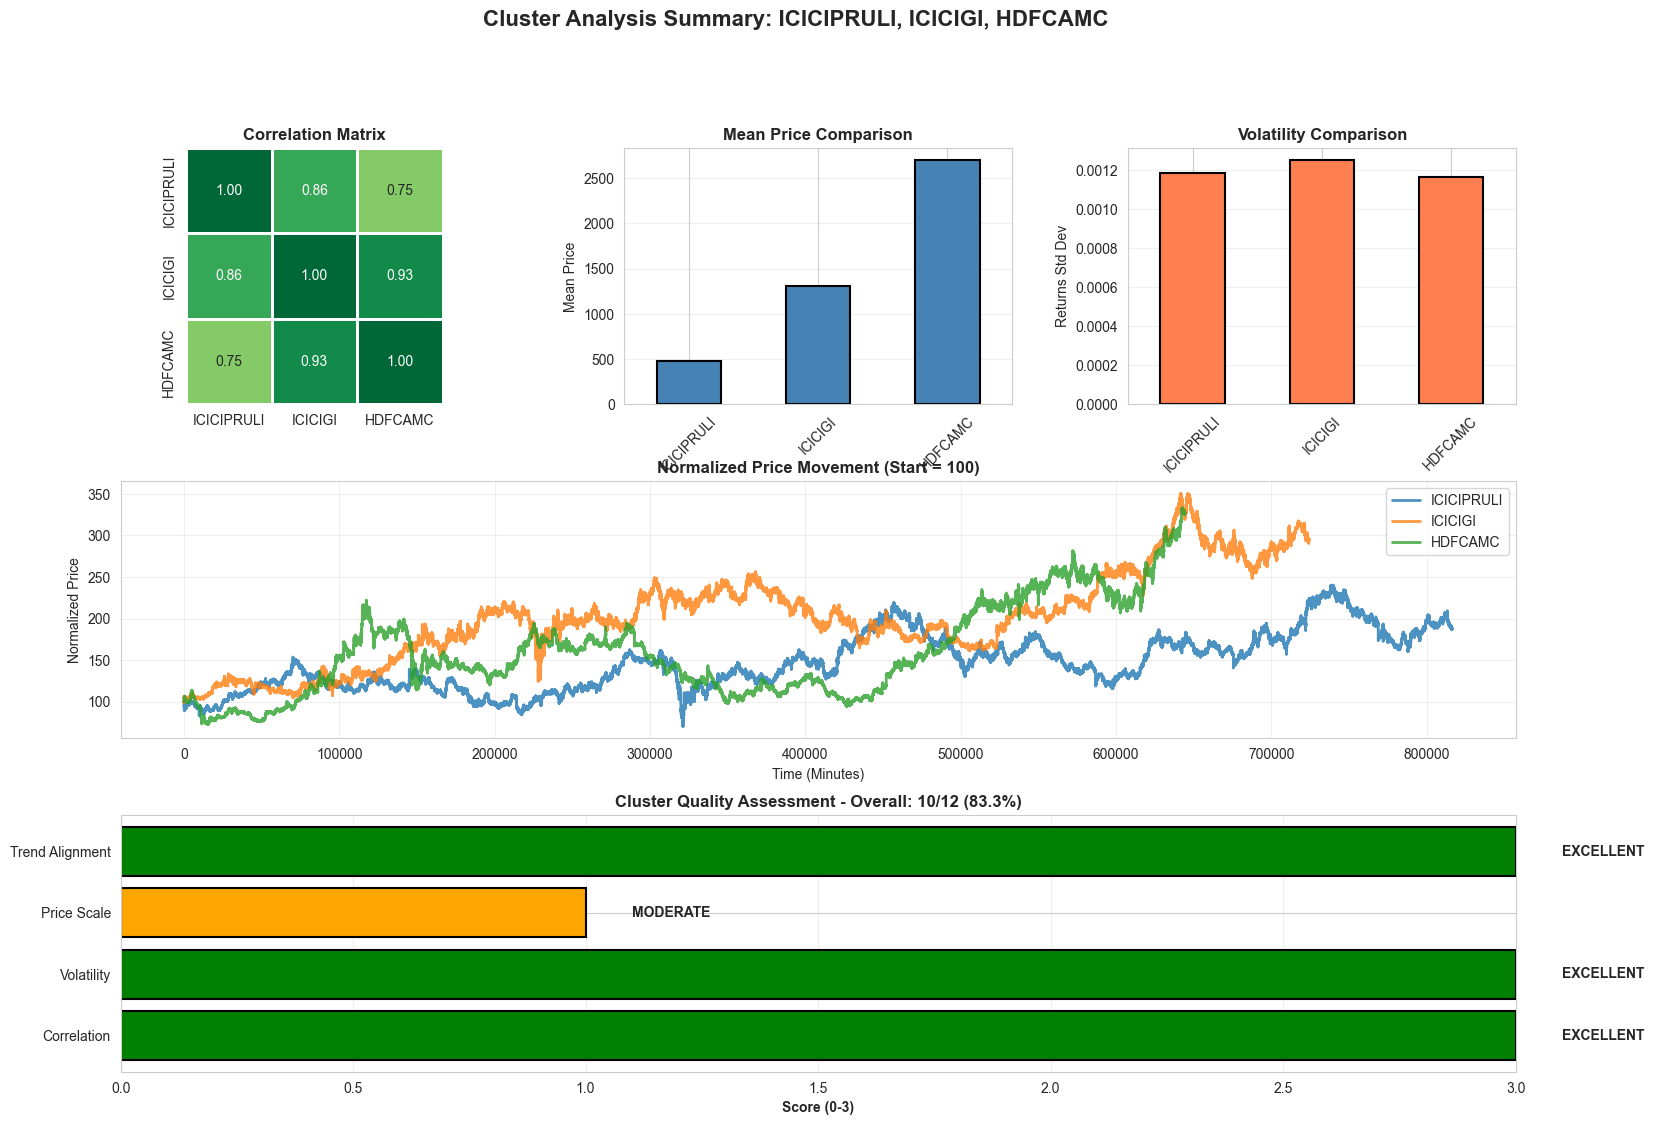


✓ Cluster analysis complete!


In [22]:
# Create comprehensive visualization summary
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Correlation Heatmap
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0.5, 
            square=True, linewidths=2, cbar=False, fmt='.2f', ax=ax1,
            vmin=0, vmax=1)
ax1.set_title('Correlation Matrix', fontsize=12, fontweight='bold')

# 2. Price Scale Comparison
ax2 = fig.add_subplot(gs[0, 1])
scale_df['Mean Price'].plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black', linewidth=1.5)
ax2.set_title('Mean Price Comparison', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Price', fontsize=10)
ax2.set_xlabel('')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Volatility Comparison
ax3 = fig.add_subplot(gs[0, 2])
vol_df['Daily Returns Std'].plot(kind='bar', ax=ax3, color='coral', edgecolor='black', linewidth=1.5)
ax3.set_title('Volatility Comparison', fontsize=12, fontweight='bold')
ax3.set_ylabel('Returns Std Dev', fontsize=10)
ax3.set_xlabel('')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Normalized Price Movement
ax4 = fig.add_subplot(gs[1, :])
for stock, df in stock_data.items():
    df = df.copy()
    if 'date' not in df.columns:
        df['date'] = pd.to_datetime(df['datetime'])
    else:
        df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    normalized = (df['close'] / df['close'].iloc[0]) * 100
    ax4.plot(normalized.values, label=stock, linewidth=2, alpha=0.8)
    
ax4.set_title('Normalized Price Movement (Start = 100)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Time (Minutes)', fontsize=10)
ax4.set_ylabel('Normalized Price', fontsize=10)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

# 5. Score Summary
ax5 = fig.add_subplot(gs[2, :])
metrics = list(scores.keys())
score_values = [scores[m][0] for m in metrics]
ratings = [scores[m][1] for m in metrics]

colors = ['green' if s == 3 else 'lightgreen' if s == 2 else 'orange' if s == 1 else 'red' 
          for s in score_values]

bars = ax5.barh(metrics, score_values, color=colors, edgecolor='black', linewidth=1.5)
ax5.set_xlim(0, 3)
ax5.set_xlabel('Score (0-3)', fontsize=10, fontweight='bold')
ax5.set_title(f'Cluster Quality Assessment - Overall: {total_score}/{max_score} ({total_score/max_score*100:.1f}%)', 
              fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='x')

# Add score labels
for i, (bar, rating) in enumerate(zip(bars, ratings)):
    width = bar.get_width()
    ax5.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
            f'{rating}', ha='left', va='center', fontweight='bold', fontsize=10)

plt.suptitle('Cluster Analysis Summary: ICICIPRULI, ICICIGI, HDFCAMC', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

print("\n" + "="*100)
print("✓ Cluster analysis complete!")
print("="*100)

## Summary

This notebook analyzed the cluster consisting of **ICICIPRULI, ICICIGI, and HDFCAMC** to determine their suitability for joint modeling.

### Key Findings:
1. **Correlation**: Measures how similarly stocks move together
2. **Volatility**: Assesses risk profile consistency
3. **Price Scale**: Evaluates comparability of price ranges
4. **Trend Alignment**: Checks if stocks move in similar directions

### Cluster Quality Score:
The overall assessment provides a score out of 12 (or 100%) indicating whether these stocks should be modeled together.

- **9-12 points (75-100%)**: Excellent cluster for joint modeling
- **6-8 points (50-75%)**: Good cluster with preprocessing
- **3-5 points (25-50%)**: Moderate cluster, use with caution
- **0-2 points (0-25%)**: Poor cluster, individual models recommended

This analysis confirms whether the pattern-based clustering correctly grouped these stocks.